In [9]:
import matplotlib

from tensorcraft.tensor import Tensor
from tensorcraft.distributions import PMeshDist, Dist, TileDist, BlockDist
from tensorcraft.viz import draw2DMesh, draw2DTensor, draw2DProcessorView, draw3DTensor

matplotlib.rcParams["figure.dpi"] = 200

SyntaxError: trailing comma not allowed without surrounding parentheses (1239005324.py, line 4)

In [2]:
t = Tensor((3, 6))
t.info()
print(t.getLinearIndex((0, 4)))

Order: 2
Shape: [3 6]
Size: 18
4


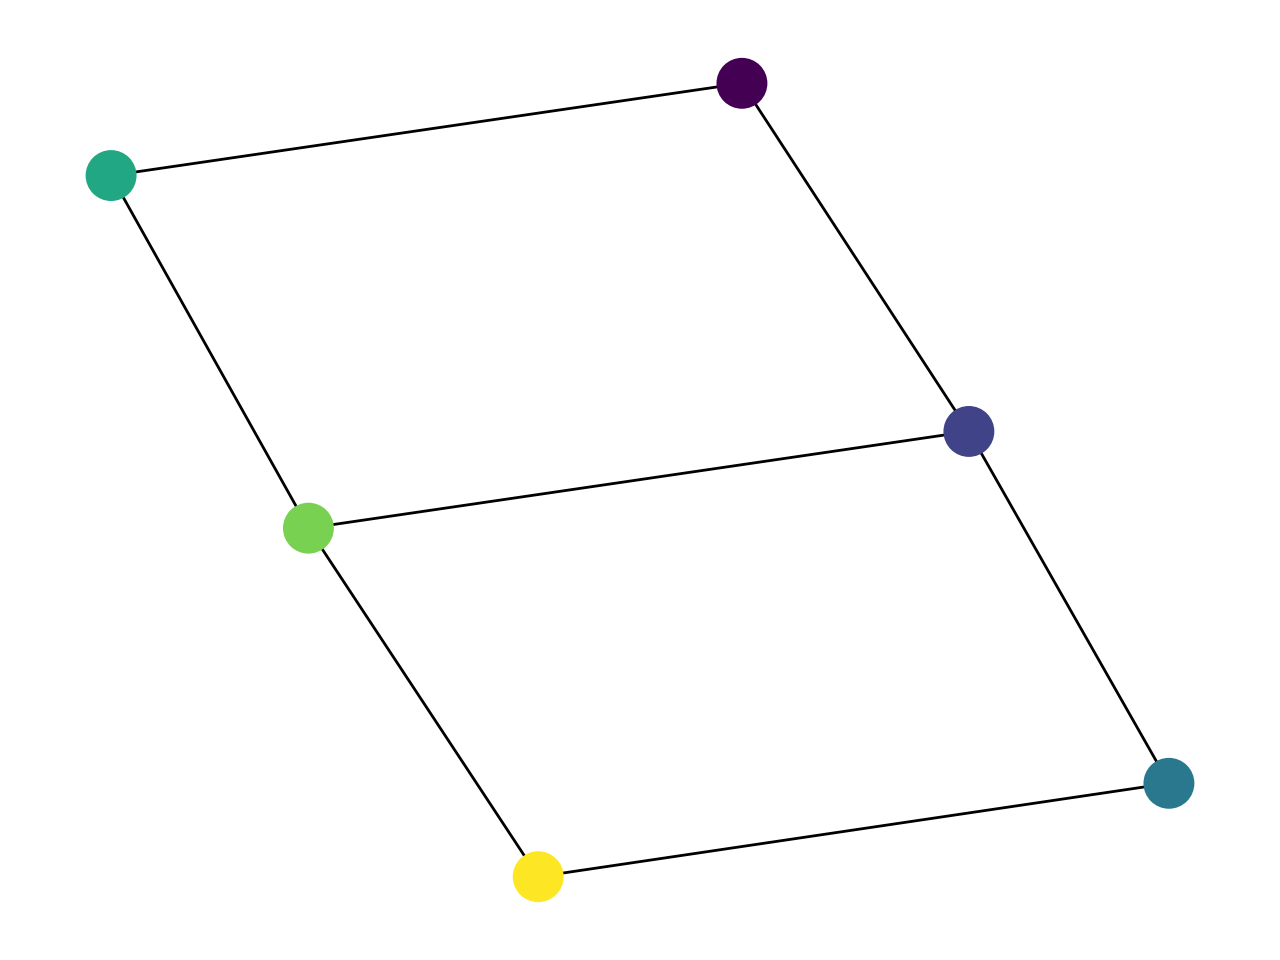

In [3]:
%matplotlib widget
mesh = Tensor((2, 3))
draw2DMesh(mesh)

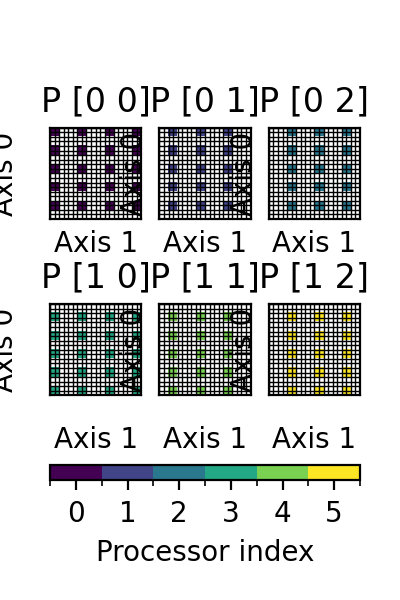

In [4]:
%matplotlib widget

tensor = Tensor((20, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
draw2DProcessorView(tensor, d)

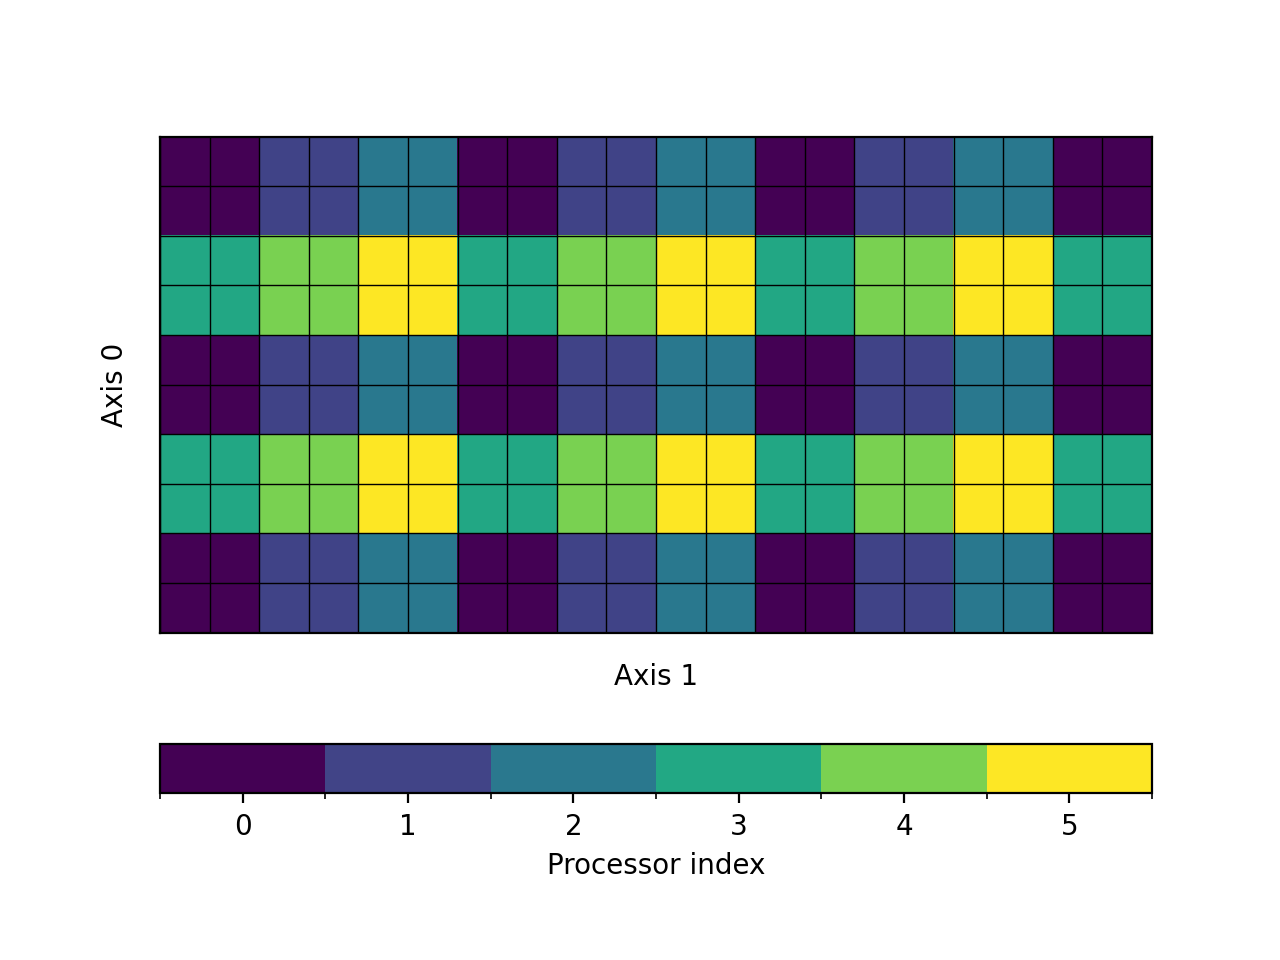

In [5]:
%matplotlib widget
tensor = Tensor((10, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
draw2DTensor(tensor, d)

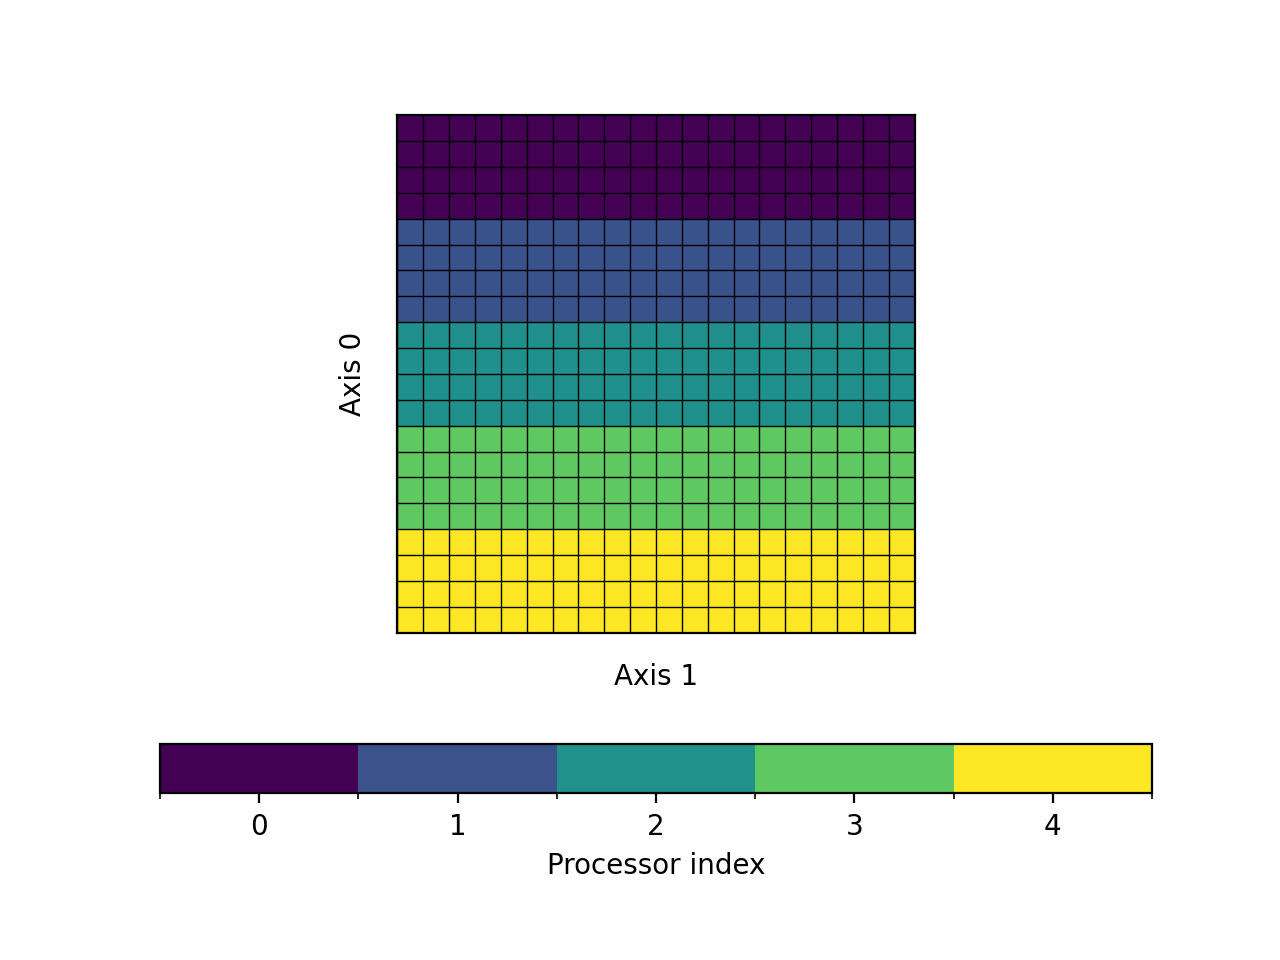

In [6]:
%matplotlib widget

tensor = Tensor((20, 20))
d = BlockDist(5, 0)
draw2DTensor(tensor, d)

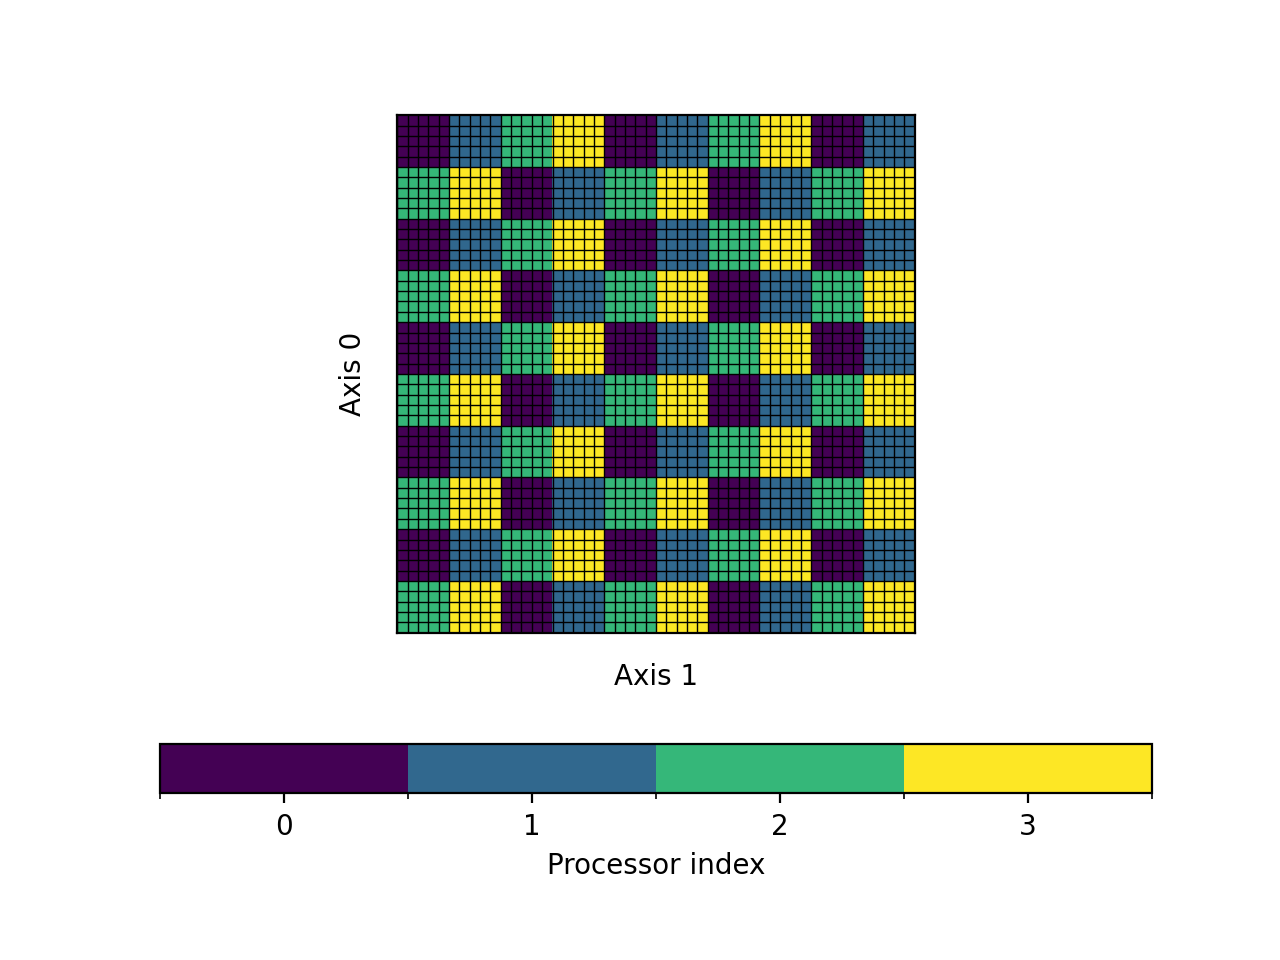

In [7]:
%matplotlib widget

tensor = Tensor((50, 50))
d = TileDist(4, 5)
draw2DTensor(tensor, d)

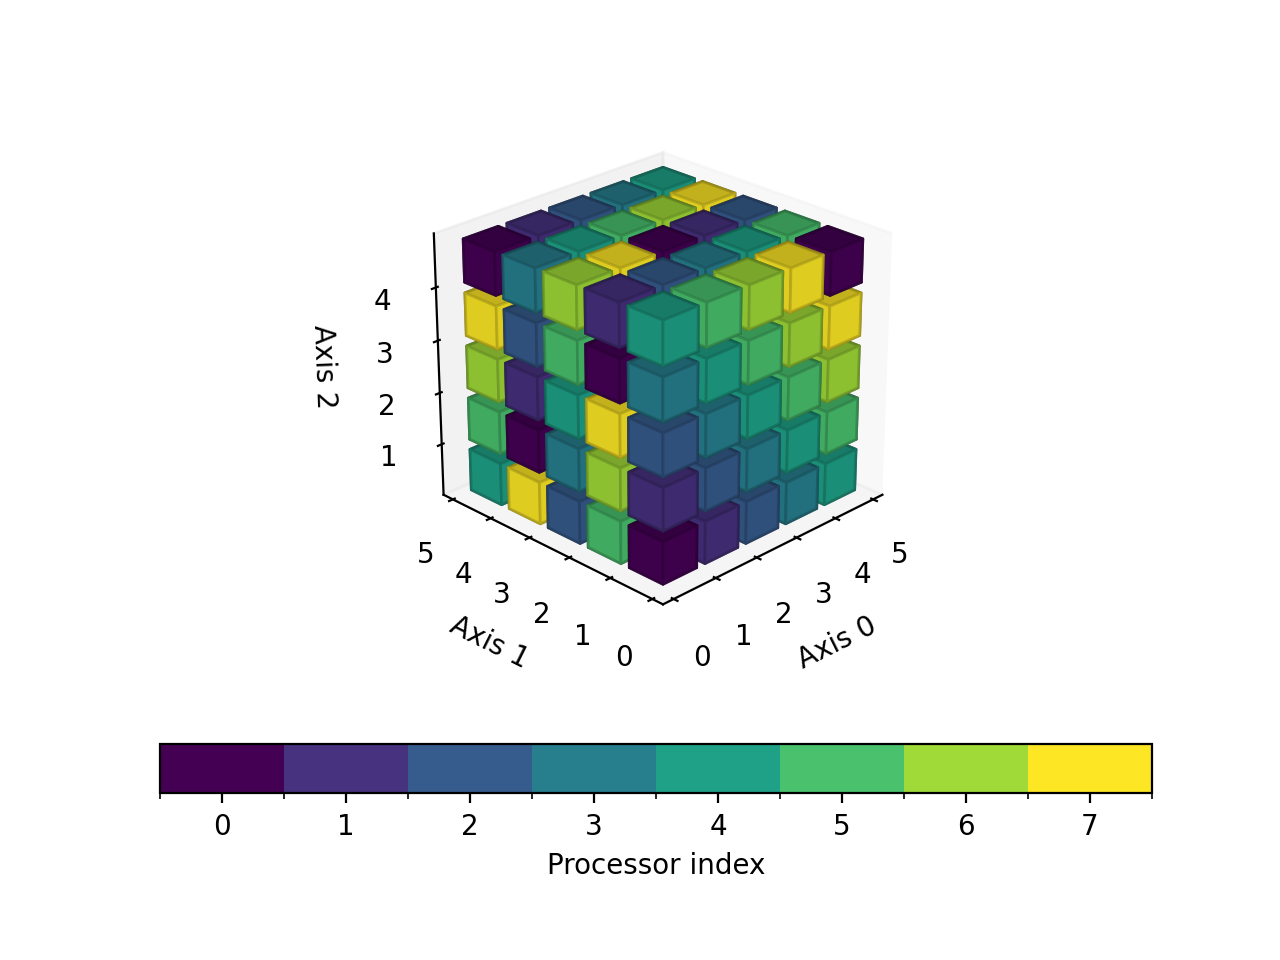

In [8]:
%matplotlib widget
tensor = Tensor((5, 5, 5))
dist = TileDist(8, 1)
# dist = BlockDist(5, 0)
draw3DTensor(tensor, dist)